# Walk through all streets in a city

Preparation of the examples for the challenge: find the shortest path through a set of streets.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Problem description

Find the shortest way going through all streets from a set of streets? This problem is known as the *Route inspection problem*.

## Data

[Seattle streets](https://data.seattle.gov/dataset/Street-Network-Database/afip-2mzr/data) from [data.seattle.gov](https://data.seattle.gov/)

### Read the data

In [ ]:
import shapefile, os
if os.path.exists("Street_Network_Database/WGS84/Street_Network_Database.shp"):
    rshp = shapefile.Reader("Street_Network_Database/WGS84/Street_Network_Database.shp")
    shapes = rshp.shapes()
    records = rshp.records()
else:
    from pyensae.datasource import download_data
    files = download_data("WGS84_seattle_street.zip")
    rshp = shapefile.Reader("Street_Network_Database.shp")
    shapes = rshp.shapes()
    records = rshp.records()    

In [ ]:
shapes[0].__dict__

{'bbox': [-122.34721334599999, 47.46946425100003, -122.346519546, 47.469471997000035],
 'parts': [0],
 'points': [[-122.34651954599997, 47.46947199700003],
  [-122.34721334599999, 47.46946425100003]],
 'shapeType': 3}

In [ ]:
{k[0]:v for k,v in zip(rshp.fields[1:], records[0])}

{'ACCESS_COD': 1,
 'AGENCY_COD': 1,
 'ARTERIAL_C': 0,
 'CITYCODE': 0,
 'COMPKEY': 0,
 'COMPTYPE': 0,
 'DIVIDED_CO': 1,
 'F_INTR_ID': 21642,
 'GIS_SEG_LE': '1.71624048000e+002',
 'LEGALLOC_C': 1,
 'L_ADRS_FRO': 977,
 'L_ADRS_TO': 999,
 'L_CITY': 'BURIEN',
 'L_STATE': 'WA',
 'L_ZIP': '98166',
 'ORD_PRE_DI': 'SW',
 'ORD_STNAME': 'SW 149TH ST',
 'ORD_STREET': '149TH',
 'ORD_STRE_1': 'ST',
 'ORD_SUF_DI': b'  ',
 'R_ADRS_FRO': 976,
 'R_ADRS_TO': 998,
 'R_CITY': 'BURIEN',
 'R_STATE': 'WA',
 'R_ZIP': '98166',
 'SEGMENT_TY': 1,
 'SHAPE_Leng': '6.93843239173e-004',
 'SNDSEG_UPD': '20040519',
 'SND_FEACOD': 1,
 'SND_ID': 37898,
 'STNAME_ID': 2569,
 'STRUCTURE_': 1,
 'ST_CODE': 0,
 'T_INTR_ID': 21641,
 'UNITID': '0',
 'UNITID2': '0',
 'VEHICLE_US': 1}

In [ ]:
from ensae_projects.data.data_geo_streets import get_fields_description
get_fields_description()

,SND_FEACODE,SEGMENT_TYPE,AGENCY_CODE,ACCESS_CODE,DIVIDED_CODE,STRUCTURE_TYPE,ARTERIAL_CODE
0,0 Alias Street,14 (stub),9 (stub),6 (stub),7 (stub),4(stub),0 (not an arterial)
1,1 Local Street,1 (street),any < 8 and = 10,any < 4 and = 7,any < 7,values less than 4,0 (not an arterial)
2,NaN,2 (street ramp),NaN,NaN,NaN,NaN,NaN
3,NaN,5 (alley),NaN,NaN,NaN,NaN,NaN
4,NaN,10 (dock),NaN,NaN,NaN,NaN,NaN
5,5 Major Street,1 (street),any < 8 and = 10,any < 4 and = 7,any < 7,values less than 4,1 (is an arterial)
6,NaN,2 (street ramp),NaN,NaN,NaN,NaN,NaN
7,9 Divided Highway,3 (limited access),1 (public),1 (open),6 (LimitedAcccess),values less than 4,4 (highway)
8,NaN,4 (limited access ramp),4 (WSDOT),NaN,NaN,NaN,NaN
9,13 Interstate Freeway,3 (limited access),4 (WSDOT),1 (open),6 (LimitedAcccess),values less than 4,5 (freeway)


### Display the streets

In [ ]:
streets5 = list(zip(records[:5], shapes[:5]))
streets5[2][1].points

[[-122.31554790099995, 47.511287922000065],
 [-122.31553241799998, 47.51120351700007],
 [-122.31552978999997, 47.51118938700006],
 [-122.31546052299996, 47.51092530900007],
 [-122.31537415499997, 47.510596031000034],
 [-122.31534125099995, 47.51046084500007],
 [-122.31532328399999, 47.51032437400005]]

In [ ]:
from random import randint

import folium
c = streets5[0][1]
print(c.bbox)
map_osm = folium.Map(location=[c.bbox[1], c.bbox[0]], zoom_start=9)
for rec, shape in streets5:
    d = {k[0]:v for k,v in zip(rshp.fields[1:], rec)}
    map_osm.add_child(folium.Marker([shape.points[0][1], shape.points[0][0]], popup=str(d)))
    map_osm.add_child(folium.PolyLine(locations=shape.points, latlon=False, weight=10))
from pyensae.notebook_helper import folium_html_map
folium_html_map(map_osm, width="60%")

[-122.34721334599999, 47.46946425100003, -122.346519546, 47.469471997000035]


<pyensae.notebook_helper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0xe546f54160>

## Find connected streets

In [ ]:
street0 = streets5[0][1].points
street0

[[-122.34651954599997, 47.46947199700003],
 [-122.34721334599999, 47.46946425100003]]

In [ ]:
def connect_streets(st1, st2):
    a1, b1 = st1[0], st1[-1]
    a2, b2 = st2[0], st2[-1]
    connect = []
    if a1 == a2:
        connect.append((0, 0))
    if a1 == b2:
        connect.append((0, 1))
    if b1 == a2:
        connect.append((1, 0))
    if b1 == b2:
        connect.append((1, 1))
    return tuple(connect) if connect else None

neighbours = []
for i, street in enumerate(shapes):
    points = street.points
    con = connect_streets(street0, points)
    if con:
        neighbours.append(i)
        
neighbours    

[0, 107, 1670, 9989, 11274, 12783]

In [ ]:
import folium
c = shapes[neighbours[0]]
map_osm = folium.Map(location=[c.bbox[1], c.bbox[0]], zoom_start=15)
for index in neighbours:
    rec, shape = records[index], shapes[index]
    map_osm.add_child(folium.Marker([shape.points[0][1], shape.points[0][0]], popup=str(index)))
    map_osm.add_child(folium.PolyLine(locations=shape.points, latlon=False, weight=10))
from pyensae.notebook_helper import folium_html_map
folium_html_map(map_osm, width="50%")

<pyensae.notebook_helper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0xe546fb67f0>

## Extraction of all streets in a short perimeter

In [ ]:
from shapely.geometry import Point, LineString

def enumerate_close(x, y, shapes, th=None):
    p = Point(x,y)
    for i, shape in enumerate(shapes):
        obj = LineString(shape.points)
        d = p.distance(obj)
        if th is None or d <= th:
            yield d, i

x, y = shapes[0].points[0]
closes = list(enumerate_close(x, y, shapes))
closes.sort()
closes[:10]

[(0.0, 0),
 (0.0, 1670),
 (0.0, 9989),
 (0.0, 12783),
 (0.0006938432391730961, 107),
 (0.0006938432391730961, 11274),
 (0.0009050591972649863, 9118),
 (0.0009122767287444535, 6488),
 (0.001006818609911273, 1101),
 (0.001006818609911273, 2808)]

In [ ]:
import folium
from ensae_projects.data.data_geo_streets import folium_html_street_map
folium_html_street_map([_[1] for _ in closes[:20]], shapes, html_width="50%", zoom_start=15)

<pyensae.notebook_helper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0xe5475294e0>

In [ ]:
def complete_subset_streets(subset, shapes):
    extension = []
    for i, shape in enumerate(shapes):
        add = []
        for s in subset:
            to = shapes[s]
            if s != i:
                con = connect_streets(shapes[s].points, shapes[i].points)
                if con is not None:
                    add.extend([_[1] for _ in con])
        if len(set(add)) == 2:
            extension.append(i)
    return extension

subset = [index for dist, index in closes[:20]]
newset = set(subset + complete_subset_streets(subset, shapes))

print(list(sorted(newset)))
folium_html_street_map(newset, shapes, html_width="50%", zoom_start=15)

[0, 107, 1003, 1101, 1670, 2418, 2803, 2808, 3353, 4553, 4994, 6265, 6488, 6712, 8378, 9118, 9989, 11274, 11394, 12783, 15023, 17680, 29114, 30370]


<pyensae.notebook_helper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0xe547c20470>

In [ ]:
from ensae_projects.data.data_geo_streets import build_streets_vertices
vertices, edges = build_streets_vertices(newset, shapes)
vertices[:3], edges[:3]

([(-122.34991548199997, 47.46763155800005),
  (-122.34991155699998, 47.468532819000075),
  (-122.349907514, 47.469446668000046)],
 [(10, 7), (5, 4), (4, 0)])

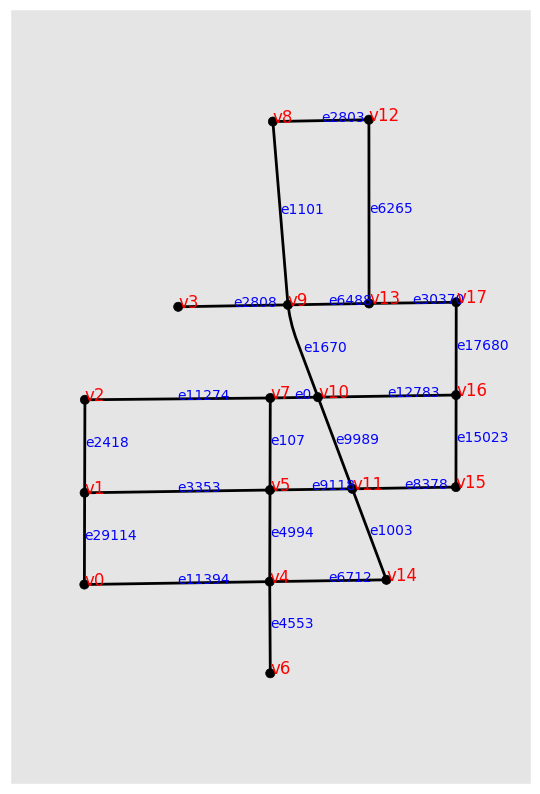

In [ ]:
from ensae_projects.data.data_geo_streets import plot_streets_network
plot_streets_network(newset, edges, vertices, shapes, figsize=(10,10))